Comparing Transpiration Data from FETCH3-osmo and observed data in Port Aransas

load the folders in a convert nc files to csv files, load csv files into dataframes

In [18]:
import os
import shutil
import xarray as xr
import pandas as pd

# Function to convert NetCDF to CSV
def convert_to_csv(folder_path):
    # Create a folder for CSV files if it doesn't exist
    csv_folder = os.path.join(folder_path, 'csv_folder')
    os.makedirs(csv_folder, exist_ok=True)
    
    # Iterate over files in the folder
    for file_name in os.listdir(folder_path):
        if file_name.endswith('.nc'):
            # Load NetCDF file
            nc_data = xr.open_dataset(os.path.join(folder_path, file_name))
            
            # Extract file name without extension
            file_base_name = os.path.splitext(file_name)[0]
            
            # Save as CSV
            csv_file_path = os.path.join(csv_folder, f"{file_base_name}.csv")
            nc_data.to_dataframe().to_csv(csv_file_path)
            
            print(f"Converted {file_name} to CSV: {csv_file_path}")

# Path to the parent folder containing subfolders
#parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/salt_sensitivity_testR9/"
#parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output\PM_runs"
#parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/Port_F_new"
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test"
#parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/GH_R1"

# Iterate over subfolders
for subfolder in os.listdir(parent_folder):
    subfolder_path = os.path.join(parent_folder, subfolder)
    if os.path.isdir(subfolder_path):
        convert_to_csv(subfolder_path)


Converted ds_canopy.nc to CSV: C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test\gh_AG_test_20241203T144751\csv_folder\ds_canopy.csv
Converted ds_root.nc to CSV: C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test\gh_AG_test_20241203T144751\csv_folder\ds_root.csv
Converted ds_sapflux.nc to CSV: C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test\gh_AG_test_20241203T144751\csv_folder\ds_sapflux.csv
Converted ds_soil.nc to CSV: C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test\gh_AG_test_20241203T144751\csv_folder\ds_soil.csv
Converted ds_canopy.nc to CSV: C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test\gh_AG_test_20241203T144952\csv_folder\ds_canopy.csv
Converted ds_root.nc to CSV: C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test\gh_AG_test_20241203T144952\csv_folder\ds_root.csv
Converted ds_sapflux.nc to CSV: C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test\gh_AG_test_20241203T144952\csv_folder\d

Sapflux plot modeled Data

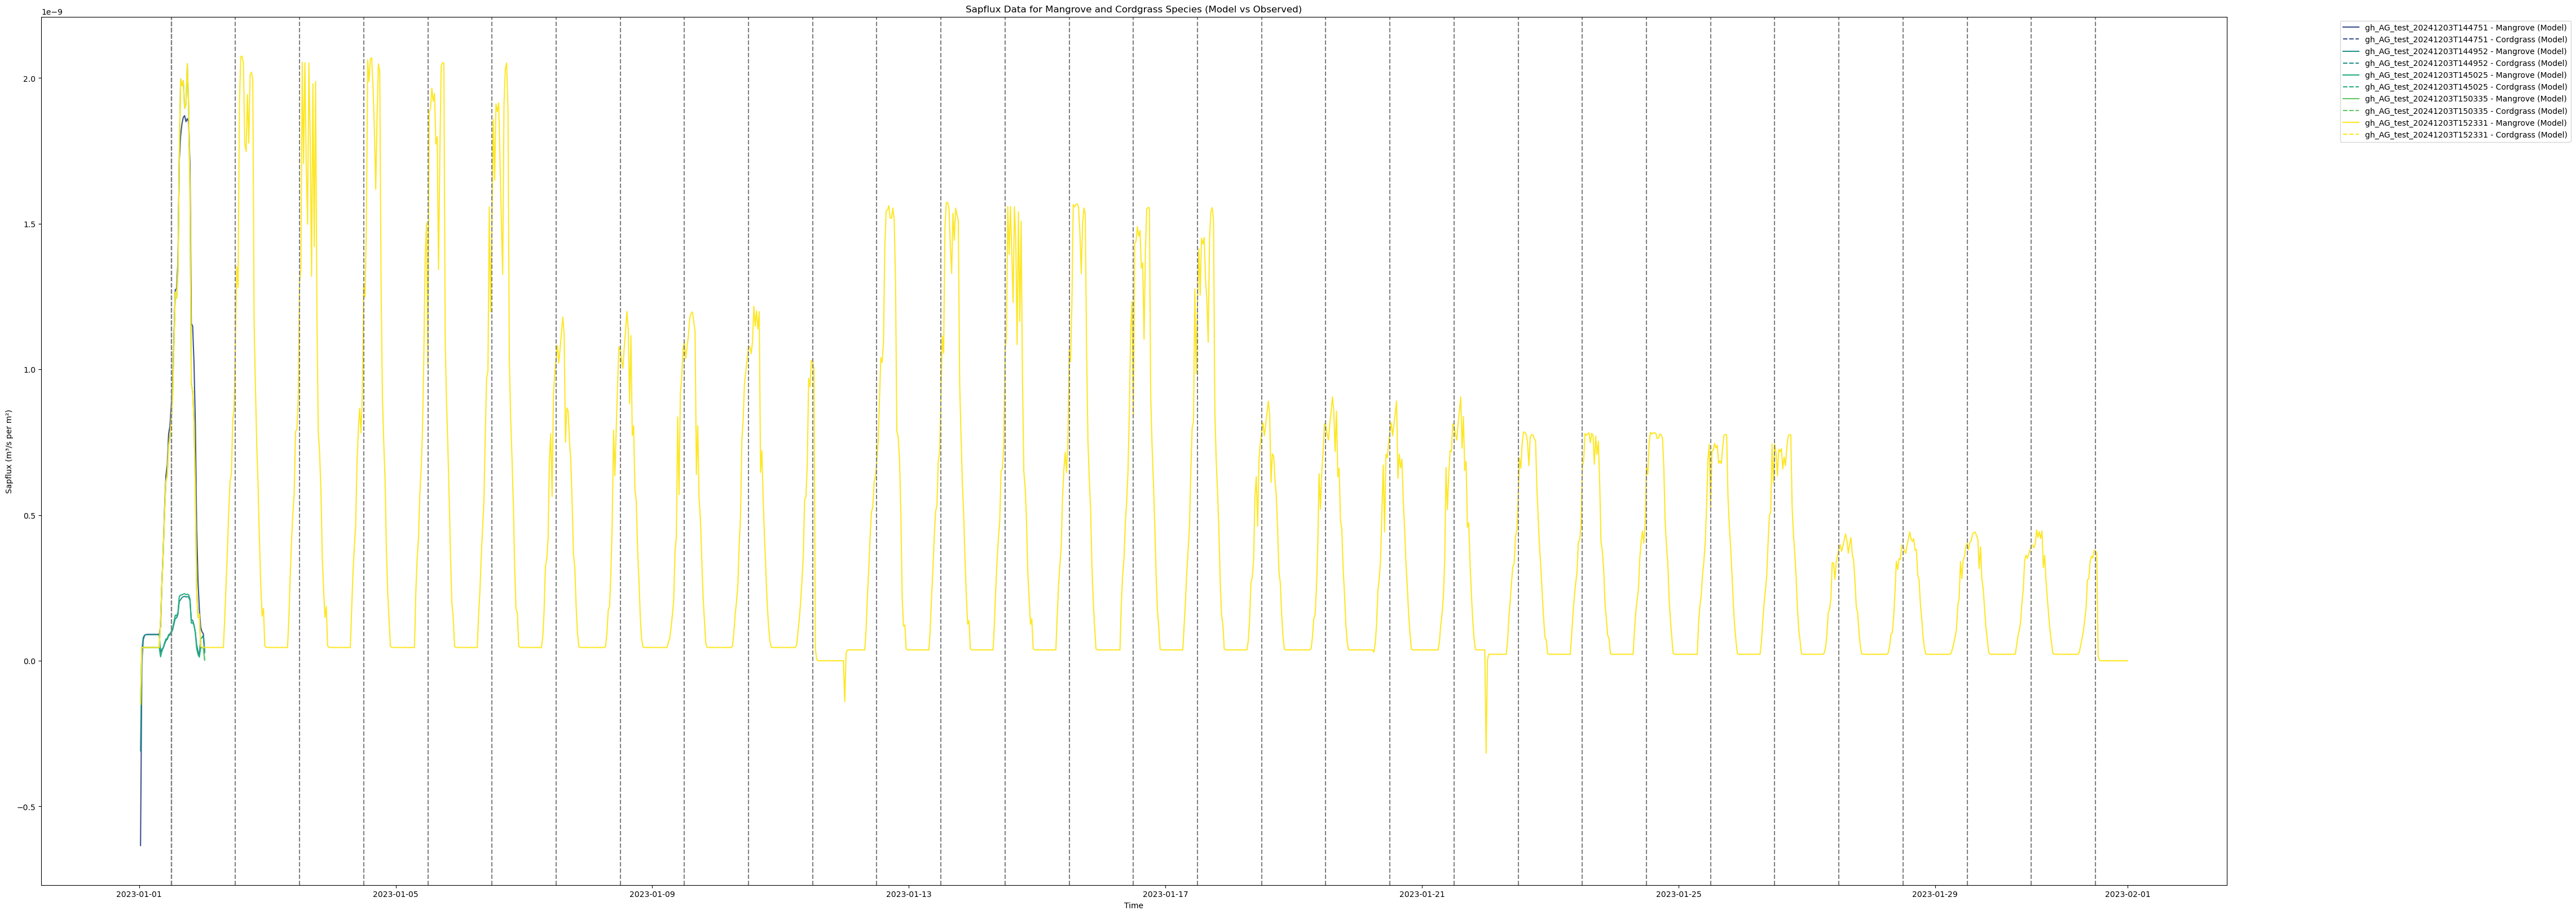

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the paths for the parent folder and observed data file
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test"
observed_data_path = R"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\data\Port_F_data\Port_F_SFdata_2010.csv"  # Update this path to the observed data file

# Load observed data CSV file
#observed_df = pd.read_csv(observed_data_path)

# Convert 'TIMESTAMP' column to datetime in observed data
#observed_df['TIMESTAMP'] = pd.to_datetime(observed_df['TIMESTAMP'])

# Initialize a list to store the dataframes
dfs = []

# Create a larger figure
plt.figure(figsize=(50, 20))

# Define a list of colors for different model runs
colors = plt.cm.viridis(np.linspace(0, 1, len(os.listdir(parent_folder))))

# Iterate over the subfolders to plot model data
for i, folder in enumerate(os.listdir(parent_folder)):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            # Load CSV file as dataframe
            df = pd.read_csv(csv_file_path)
            
            # Convert 'time' column to datetime in model data
            df['time'] = pd.to_datetime(df['time'])
            
            # Filter data for mangrove and cordgrass species
            mangrove_df = df[df['species'] == 'mangrove']
            cordgrass_df = df[df['species'] == 'cordgrass']
            
            # Assign a unique color for this run
            color = colors[i]
            
            # Plot sapflux data for mangrove (model)
            plt.plot(mangrove_df['time'], mangrove_df['sapflux'], label=f'{folder} - Mangrove (Model)', color=color)
            
            # Plot sapflux data for cordgrass (model)
            plt.plot(cordgrass_df['time'], cordgrass_df['sapflux'] * 3.6e6, label=f'{folder} - Cordgrass (Model)', color=color, linestyle='--')
            
            # Draw vertical dashed lines at all locations of 12 noon
            for day in mangrove_df['time']:
                if day.hour == 12 and day.minute == 0:  # Check for both hour and minute values
                    plt.axvline(x=day, linestyle='--', color='gray')

# Filter observed data to the same date range as model data
#date_range_start = mangrove_df['time'].min()
#date_range_end = mangrove_df['time'].max()
#observed_df = observed_df[(observed_df['TIMESTAMP'] >= date_range_start) & (observed_df['TIMESTAMP'] <= date_range_end)]

# Convert observed data columns to float, handling errors by coercing to NaN
#for col in ['SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7', 'SF8', 'avg_m3/s']:
    #observed_df[col] = pd.to_numeric(observed_df[col], errors='coerce')

# Plot observed sap flux data
#plt.plot(observed_df['TIMESTAMP'], observed_df['avg_m3/s'], label='Observed - Avg', color='green', linestyle='-')

# Label axes and title
plt.xlabel('Time')
plt.ylabel('Sapflux (m³/s per m²)')
plt.title('Sapflux Data for Mangrove and Cordgrass Species (Model vs Observed)')
#plt.ylim(0,8e-8)
# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_42588\2534360147.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mangrove_df['mm_water_day'] = mangrove_df['sapflux'] * SECONDS_PER_DAY * M3_TO_MM
C:\Users\maria\AppData\Local\Temp\ipykernel_42588\2534360147.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mangrove_df['mm_water_day'] = mangrove_df['sapflux'] * SECONDS_PER_DAY * M3_TO_MM
C:\Users\maria\AppData\Local\Temp\ipykernel_42588\2534360147.py:29: SettingWithCopyWarning: 
A value is trying to be set

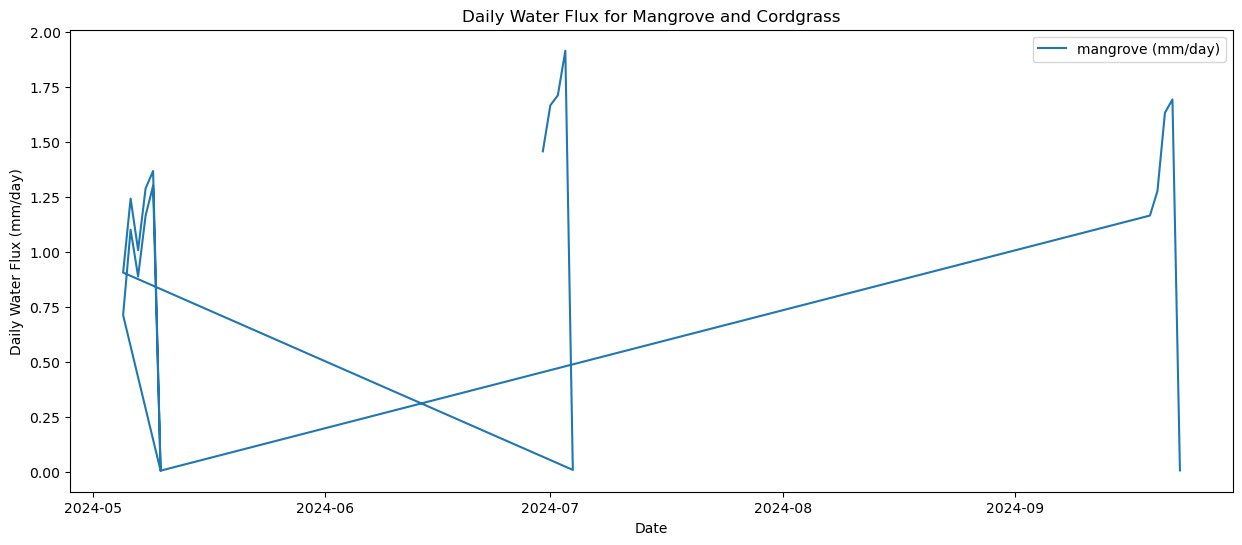

In [45]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Constants
SECONDS_PER_DAY = 86400  # Number of seconds in a day
M3_TO_MM = 1000  # Conversion from cubic meters to mm water

# Initialize a list to store the dataframes
daily_water_flux = []

# Iterate over the subfolders to calculate mm/day
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            # Load CSV file as dataframe
            df = pd.read_csv(csv_file_path)
            
            # Convert 'time' column to datetime
            df['time'] = pd.to_datetime(df['time'])
            
            # Filter for mangrove and cordgrass species
            mangrove_df = df[df['species'] == 'mangrove']
            cordgrass_df = df[df['species'] == 'cordgrass']
            
            # Calculate mm/day for mangroves and cordgrass
            mangrove_df['mm_water_day'] = mangrove_df['sapflux'] * SECONDS_PER_DAY * M3_TO_MM
            cordgrass_df['mm_water_day'] = cordgrass_df['sapflux'] * SECONDS_PER_DAY * M3_TO_MM
            
            # Summarize daily flux for mangrove and cordgrass
            mangrove_daily = mangrove_df.groupby(mangrove_df['time'].dt.date)['mm_water_day'].sum().reset_index(name='mm_water_day')
            mangrove_daily['species'] = 'mangrove'
            
            cordgrass_daily = cordgrass_df.groupby(cordgrass_df['time'].dt.date)['mm_water_day'].sum().reset_index(name='mm_water_day')
            cordgrass_daily['species'] = 'cordgrass'
            
            # Combine the data
            daily_water_flux.append(mangrove_daily)
            daily_water_flux.append(cordgrass_daily)

# Combine all daily flux data into a single DataFrame
daily_water_flux_df = pd.concat(daily_water_flux, ignore_index=True)

# Plot daily water flux
plt.figure(figsize=(15, 6))
for species, data in daily_water_flux_df.groupby('species'):
    plt.plot(data['time'], data['mm_water_day'], label=f'{species} (mm/day)')

plt.xlabel('Date')
plt.ylabel('Daily Water Flux (mm/day)')
plt.title('Daily Water Flux for Mangrove and Cordgrass')
plt.legend()
plt.show()


In [21]:
# Constants
T_midday = 0.0019*1000  # Example midday transpiration rate in mmol H2O m^-2 s^-1
LAI = 3.8       # Leaf area index (dimensionless)
crown_area = 0.25  # Crown area in m^2
scaling_factor = 4  # Daily transpiration scaling factor (based on literature)

# Step 1: Total leaf area (m²)
total_leaf_area = LAI 

# Step 2: Convert midday transpiration rate to mm water
T_midday_mm = T_midday * 1.18e-5  # Convert to mm water

# Step 3: Total midday transpiration (mm)
T_midday_total = 40.20789569 * LAI/1000/1000

# Step 4: Scale to daily ET (mm/day)
ET_daily = T_midday_total *60*60*8

print(f"Daily ET Estimate: {ET_daily:.2f} mm/day")


Daily ET Estimate: 4.40 mm/day


Bias: 2.7474023843036844e-10
Reduced Chi-Squared: 2.214006141489999e-17
Bias: 4.619477093863264e-09
Reduced Chi-Squared: 5.831859866232717e-17


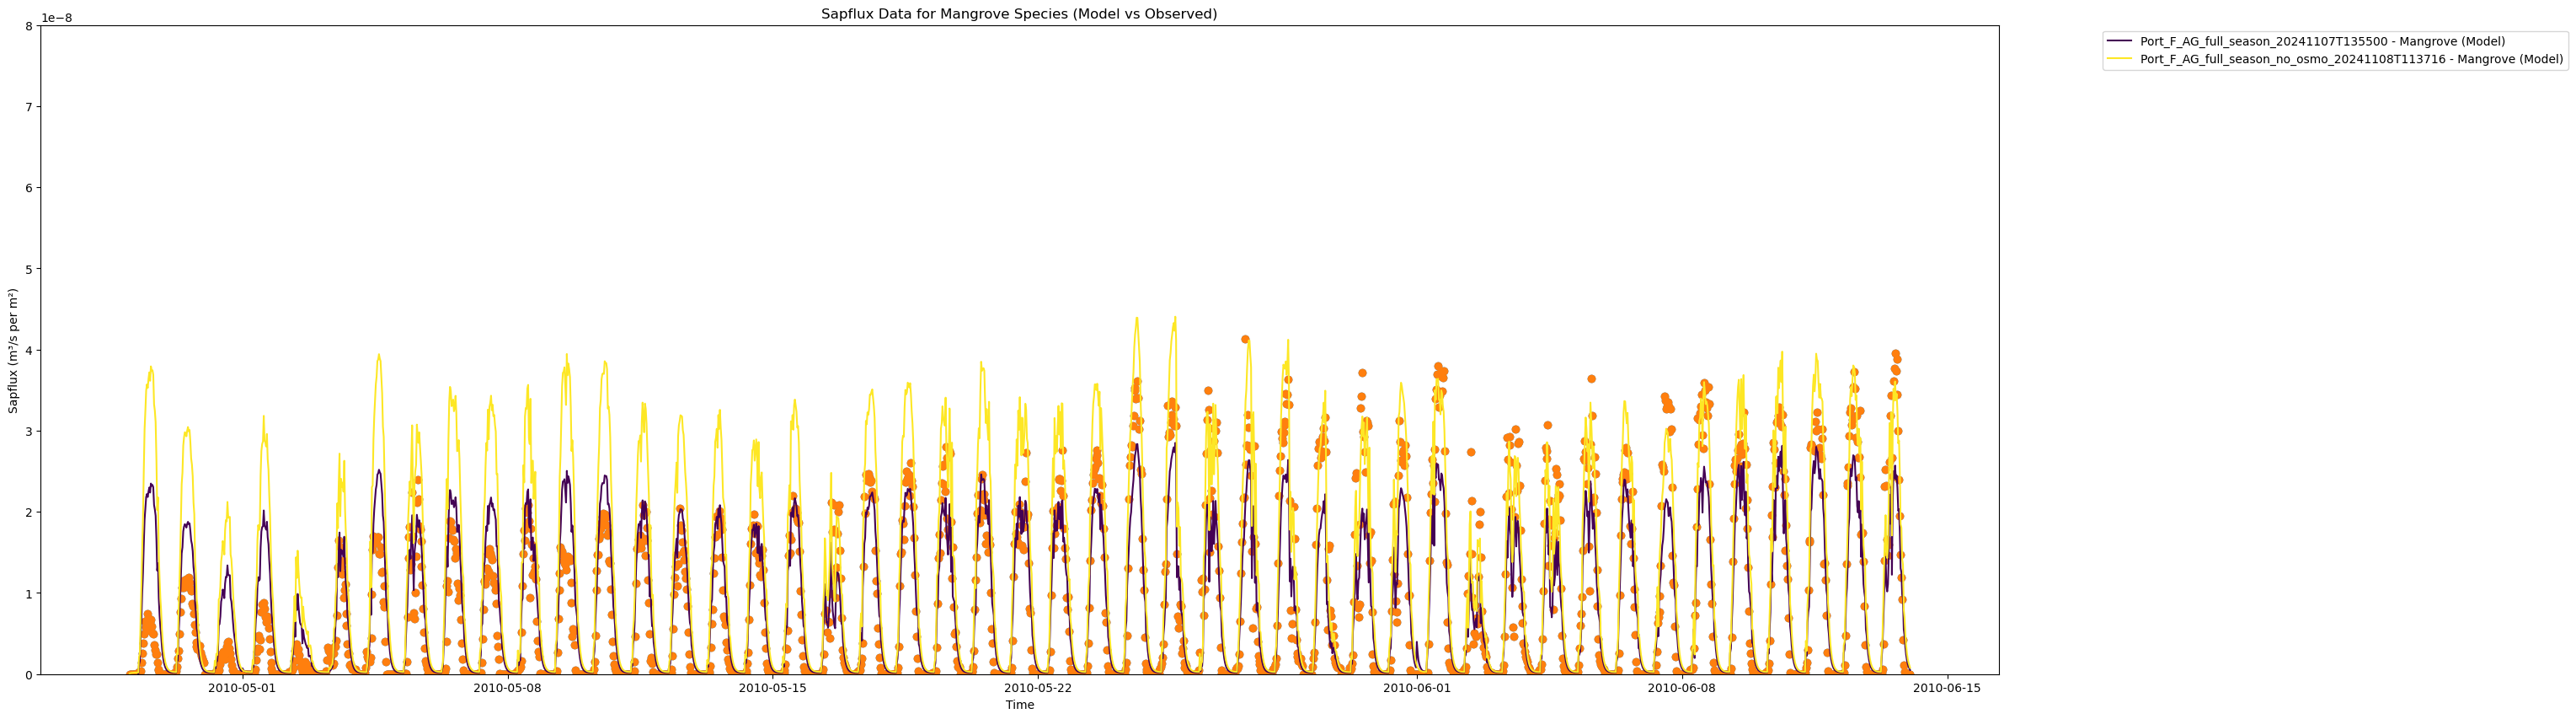

NMAE for Port_F_AG_full_season_20241107T135500 - Mangrove (Model): 0.3882
NMAE for Port_F_AG_full_season_no_osmo_20241108T113716 - Mangrove (Model): 0.6344


In [80]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the paths for the parent folder and observed data file
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/CH2_practice"
observed_data_path = R"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\data\Port_F_data\Port_F_SFdata_2010.csv"

# Load observed data CSV file
observed_df = pd.read_csv(observed_data_path)
observed_df['TIMESTAMP'] = pd.to_datetime(observed_df['TIMESTAMP'])

# Initialize a list to store NMAE values for each model run
nmae_values = []

# Initialize a larger figure for plotting
plt.figure(figsize=(30, 10))

# Define colors for different model runs
colors = plt.cm.viridis(np.linspace(0, 1, len(os.listdir(parent_folder))))

# Iterate over subfolders to plot model data and calculate NMAE
for i, folder in enumerate(os.listdir(parent_folder)):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            # Load model data
            df = pd.read_csv(csv_file_path)
            df['time'] = pd.to_datetime(df['time'])
            
            # Filter data for mangrove species
            mangrove_df = df[df['species'] == 'mangrove']
            
            # Match timestamps between observed and model data
            merged_df = pd.merge_asof(mangrove_df[['time', 'sapflux']], observed_df[['TIMESTAMP', 'avg_m3/s']],
                                      left_on='time', right_on='TIMESTAMP', direction='nearest').dropna()
            # Convert model 'sapflux' and observed 'avg_m3/s' columns to numeric, coercing errors to NaN
            merged_df['sapflux'] = pd.to_numeric(merged_df['sapflux'], errors='coerce')
            merged_df['avg_m3/s'] = pd.to_numeric(merged_df['avg_m3/s'], errors='coerce')

            # Drop any rows where 'sapflux' or 'avg_m3/s' have NaN values due to conversion errors
            merged_df = merged_df.dropna(subset=['sapflux', 'avg_m3/s'])

            # Proceed with the NMAE calculation as before
            mae = np.mean(np.abs(merged_df['sapflux'] - merged_df['avg_m3/s']))
            nmae = mae / np.mean(merged_df['avg_m3/s'])
            nmae_values.append(nmae)
            # Calculate the bias as the mean difference between simulated and observed values
            bias = np.mean(merged_df['sapflux'] - merged_df['avg_m3/s'])

            # Print or store the bias value
            print("Bias:", bias)
            sigma = 1.0

            # Calculate the squared residuals normalized by sigma
            chi_squared = np.sum(((merged_df['sapflux'] - merged_df['avg_m3/s']) ** 2) / sigma**2)

            # Calculate reduced chi-squared
            N = len(merged_df)  # Number of data points
            p = 1               # Number of model parameters (adjust if your model has more parameters)
            reduced_chi_squared = chi_squared / (N - p)

            # Print or store the reduced chi-squared value
            print("Reduced Chi-Squared:", reduced_chi_squared)
                        
            # Plotting
            color = colors[i]
            plt.plot(mangrove_df['time'], mangrove_df['sapflux'], label=f'{folder} - Mangrove (Model)', color=color)
            plt.scatter(merged_df['TIMESTAMP'],merged_df['avg_m3/s'])
# Plot observed data
            #plt.plot(observed_df['TIMESTAMP'], observed_df['avg_m3/s'], label='Observed - Avg', color='green', linestyle='-')

# Label axes and title
plt.xlabel('Time')
plt.ylabel('Sapflux (m³/s per m²)')
plt.title('Sapflux Data for Mangrove Species (Model vs Observed)')
plt.ylim(0, 8e-8)

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Display NMAE results
for i, folder in enumerate(os.listdir(parent_folder)):
    if os.path.isdir(os.path.join(parent_folder, folder)):
        print(f'NMAE for {folder} - Mangrove (Model): {nmae_values[i]:.4f}')


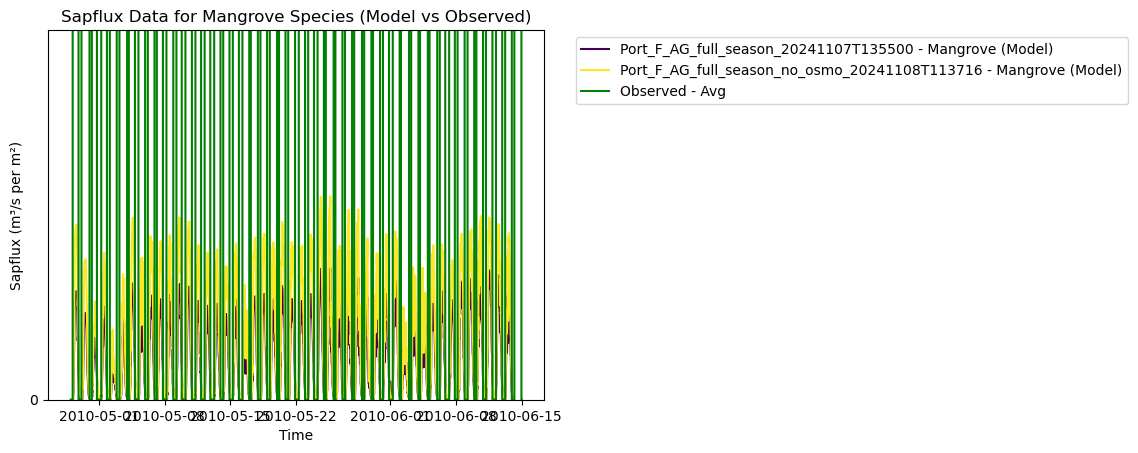

Results for Port_F_AG_full_season_20241107T135500 - Mangrove (Model):
  NMAE: 0.3882
  MAE: 3.1578e-09
  Bias: 2.7474e-10
  Reduced Chi-Squared: 2.2140e-17
  AIC: -86399.6193
  R-squared: 0.8071
  P-value: 0.0000e+00
  Regression Line Equation: y = 0.7275x + 0.0000
  RMSE: 4.7043e-09

Results for Port_F_AG_full_season_no_osmo_20241108T113716 - Mangrove (Model):
  NMAE: 0.6344
  MAE: 5.1607e-09
  Bias: 4.6195e-09
  Reduced Chi-Squared: 5.8319e-17
  AIC: -84217.5159
  R-squared: 0.7783
  P-value: 0.0000e+00
  Regression Line Equation: y = 1.0770x + 0.0000
  RMSE: 7.6350e-09



In [81]:
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error

# Initialize lists to store R-squared, P-value, RMSE, and MAE values for each model run
r_squared_values = []
p_values = []
rmse_values = []
mae_values = []
regression_equations = []

# Iterate over subfolders to calculate metrics
for i, folder in enumerate(os.listdir(parent_folder)):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            # Load model data and merge with observed data
            df = pd.read_csv(csv_file_path)
            df['time'] = pd.to_datetime(df['time'])
            mangrove_df = df[df['species'] == 'mangrove']
            merged_df = pd.merge_asof(
                mangrove_df[['time', 'sapflux']], 
                observed_df[['TIMESTAMP', 'avg_m3/s']],
                left_on='time', right_on='TIMESTAMP', direction='nearest'
            ).dropna()
            merged_df['sapflux'] = pd.to_numeric(merged_df['sapflux'], errors='coerce')
            merged_df['avg_m3/s'] = pd.to_numeric(merged_df['avg_m3/s'], errors='coerce')
            merged_df = merged_df.dropna(subset=['sapflux', 'avg_m3/s'])

            # Calculate NMAE
            mae = np.mean(np.abs(merged_df['sapflux'] - merged_df['avg_m3/s']))
            nmae = mae / np.mean(merged_df['avg_m3/s'])
            nmae_values.append(nmae)
            mae_values.append(mae)  # Store MAE for output
            
            # Calculate Bias
            bias = np.mean(merged_df['sapflux'] - merged_df['avg_m3/s'])
            bias_values.append(bias)
            
            # Calculate Reduced Chi-Squared
            sigma = 1.0
            chi_squared = np.sum(((merged_df['sapflux'] - merged_df['avg_m3/s']) ** 2) / sigma**2)
            N = len(merged_df)
            p = 1
            reduced_chi_squared = chi_squared / (N - p)
            reduced_chi_squared_values.append(reduced_chi_squared)
            
            # Calculate AIC
            rss = np.sum((merged_df['sapflux'] - merged_df['avg_m3/s']) ** 2)
            aic = 2 * p + N * np.log(rss / N)
            aic_values.append(aic)

            # Perform linear regression to obtain R-squared, P-value, slope, intercept
            slope, intercept, r_value, p_value, std_err = linregress(merged_df['avg_m3/s'], merged_df['sapflux'])
            r_squared = r_value ** 2
            r_squared_values.append(r_squared)
            p_values.append(p_value)
            regression_equations.append(f"y = {slope:.4f}x + {intercept:.4f}")

            # Calculate RMSE
            rmse = np.sqrt(mean_squared_error(merged_df['avg_m3/s'], merged_df['sapflux']))
            rmse_values.append(rmse)

            # Plotting
            color = colors[i]
            plt.plot(mangrove_df['time'], mangrove_df['sapflux'], label=f'{folder} - Mangrove (Model)', color=color)

# Plot observed data
plt.plot(observed_df['TIMESTAMP'], observed_df['avg_m3/s'], label='Observed - Avg', color='green', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Sapflux (m³/s per m²)')
plt.title('Sapflux Data for Mangrove Species (Model vs Observed)')
plt.ylim(0, 8e-8)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Display results for each model run
for i, folder in enumerate(os.listdir(parent_folder)):
    if os.path.isdir(os.path.join(parent_folder, folder)):
        print(f"Results for {folder} - Mangrove (Model):")
        print(f"  NMAE: {nmae_values[i]:.4f}")
        print(f"  MAE: {mae_values[i]:.4e}")  # MAE output
        print(f"  Bias: {bias_values[i]:.4e}")
        print(f"  Reduced Chi-Squared: {reduced_chi_squared_values[i]:.4e}")
        print(f"  AIC: {aic_values[i]:.4f}")
        print(f"  R-squared: {r_squared_values[i]:.4f}")
        print(f"  P-value: {p_values[i]:.4e}")
        print(f"  Regression Line Equation: {regression_equations[i]}")
        print(f"  RMSE: {rmse_values[i]:.4e}")
        print()  # Blank line for readability


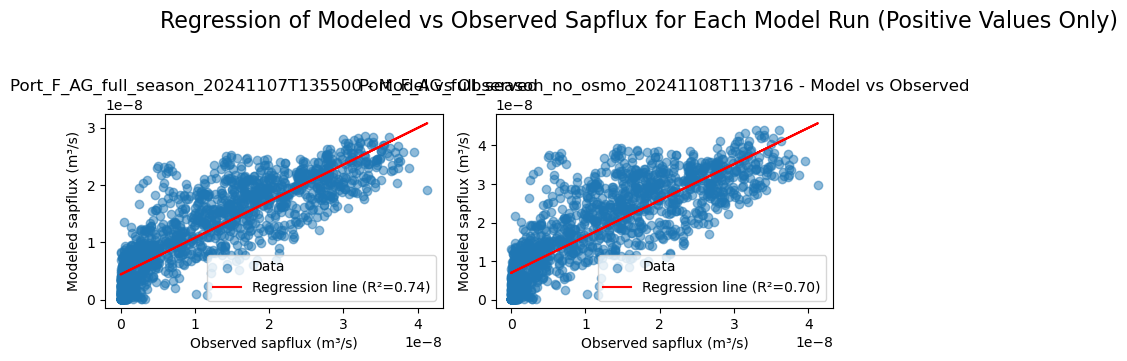

In [84]:
import matplotlib.pyplot as plt

# Initialize a figure for regression plots
plt.figure(figsize=(12, 8))

# Iterate over each model run and create a subplot for each
for i, folder in enumerate(os.listdir(parent_folder)):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            # Load and merge data
            df = pd.read_csv(csv_file_path)
            df['time'] = pd.to_datetime(df['time'])
            mangrove_df = df[df['species'] == 'mangrove']
            merged_df = pd.merge_asof(
                mangrove_df[['time', 'sapflux']], 
                observed_df[['TIMESTAMP', 'avg_m3/s']],
                left_on='time', right_on='TIMESTAMP', direction='nearest'
            ).dropna()
            
            # Convert columns to numeric and drop rows with negative values
            merged_df['sapflux'] = pd.to_numeric(merged_df['sapflux'], errors='coerce')
            merged_df['avg_m3/s'] = pd.to_numeric(merged_df['avg_m3/s'], errors='coerce')
            merged_df = merged_df.dropna(subset=['sapflux', 'avg_m3/s'])
            merged_df = merged_df[(merged_df['sapflux'] > 0) & (merged_df['avg_m3/s'] > 0)]
            
            # Perform linear regression to get line parameters
            slope, intercept, r_value, p_value, std_err = linregress(merged_df['avg_m3/s'], merged_df['sapflux'])
            r_squared = r_value ** 2

            # Create scatter plot with regression line for each model run
            plt.subplot(3, 3, i + 1)  # Adjust 3,3 based on number of folders to fit all plots
            plt.scatter(merged_df['avg_m3/s'], merged_df['sapflux'], alpha=0.5, label='Data')
            plt.plot(
                merged_df['avg_m3/s'], 
                slope * merged_df['avg_m3/s'] + intercept, 
                color='red', 
                label=f'Regression line (R²={r_squared:.2f})'
            )
            
            # Label plot details
            plt.title(f"{folder} - Model vs Observed")
            plt.xlabel("Observed sapflux (m³/s)")
            plt.ylabel("Modeled sapflux (m³/s)")
            plt.legend()
            plt.tight_layout()

# Display the combined regression plot figure
plt.suptitle("Regression of Modeled vs Observed Sapflux for Each Model Run (Positive Values Only)", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


In [64]:
# Calculate the bias as the mean difference between simulated and observed values
bias = np.mean(merged_df['sapflux'] - merged_df['avg_m3/s'])

# Print or store the bias value
print("Bias:", bias)


Bias: 4.619477093863264e-09


In [66]:
# Assuming no specific uncertainties provided, use a constant sigma
# You may replace '1.0' with a vector if specific uncertainties are known
sigma = 1.0

# Calculate the squared residuals normalized by sigma
chi_squared = np.sum(((merged_df['sapflux'] - merged_df['avg_m3/s']) ** 2) / sigma**2)

# Calculate reduced chi-squared
N = len(merged_df)  # Number of data points
p = 1               # Number of model parameters (adjust if your model has more parameters)
reduced_chi_squared = chi_squared / (N - p)

# Print or store the reduced chi-squared value
print("Reduced Chi-Squared:", reduced_chi_squared)


Reduced Chi-Squared: 5.831859866232717e-17


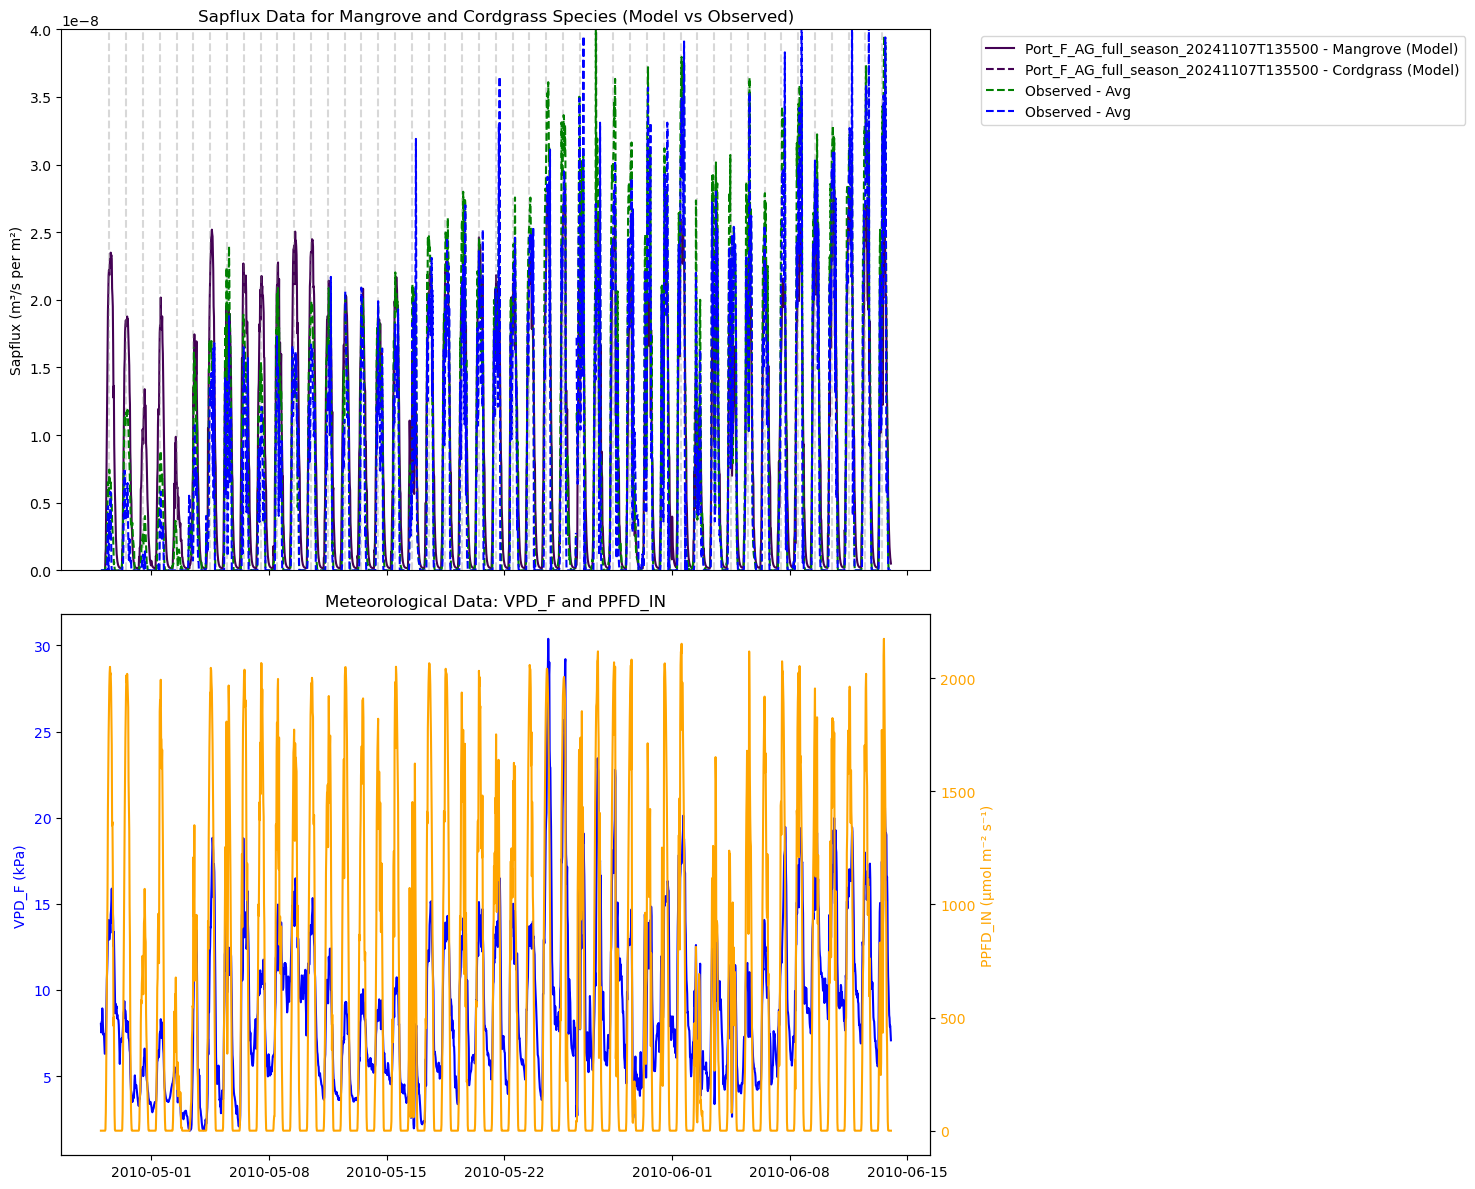

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define paths for the parent folder, observed data file, and meteorological data file
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/CH2_practice"
observed_data_path = R"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\data\Port_F_data\Port_F_SFdata_2010.csv"
met_data_path = R"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\data\Port_F_data\Port_F_2010_met_update.csv"  # Update this path as needed

# Load observed data CSV file
observed_df = pd.read_csv(observed_data_path)
observed_df['TIMESTAMP'] = pd.to_datetime(observed_df['TIMESTAMP'])

# Load meteorological data CSV file
met_df = pd.read_csv(met_data_path)
met_df['TIMESTAMP'] = pd.to_datetime(met_df['TIMESTAMP_START'])

# Initialize the plot with subplots for sapflux and met data
fig, (ax_sapflux, ax_met) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Colors for different model runs
colors = plt.cm.viridis(np.linspace(0, 1, len(os.listdir(parent_folder))))

# Iterate over subfolders to plot model data
for i, folder in enumerate(os.listdir(parent_folder)):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            df = pd.read_csv(csv_file_path)
            df['time'] = pd.to_datetime(df['time'])
            
            # Filter data for mangrove and cordgrass
            mangrove_df = df[df['species'] == 'mangrove']
            cordgrass_df = df[df['species'] == 'cordgrass']
            
            # Unique color for each run
            color = colors[i]
            
            # Plot sapflux data for mangrove (model)
            ax_sapflux.plot(mangrove_df['time'], mangrove_df['sapflux'], label=f'{folder} - Mangrove (Model)', color=color)
            ax_sapflux.plot(cordgrass_df['time'], cordgrass_df['sapflux'] * 3.6e6, label=f'{folder} - Cordgrass (Model)', color=color, linestyle='--')

            # Vertical lines at 12:00 noon
            for day in mangrove_df['time']:
                if day.hour == 12 and day.minute == 0:
                    ax_sapflux.axvline(x=day, linestyle='--', color='gray', alpha=0.3)

# Filter observed data to the model data's date range
date_range_start = mangrove_df['time'].min()
date_range_end = mangrove_df['time'].max()
observed_df = observed_df[(observed_df['TIMESTAMP'] >= date_range_start) & (observed_df['TIMESTAMP'] <= date_range_end)]
met_df = met_df[(met_df['TIMESTAMP'] >= date_range_start) & (met_df['TIMESTAMP'] <= date_range_end)]

# Convert observed columns to float
for col in ['SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7', 'SF8', 'avg_m3/s']:
    observed_df[col] = pd.to_numeric(observed_df[col], errors='coerce')

# Plot observed sap flux data
ax_sapflux.plot(observed_df['TIMESTAMP'], observed_df['avg_m3/s'], label='Observed - Avg', color='green', linestyle='--')
ax_sapflux.plot(observed_df['TIMESTAMP'], observed_df['SF7'], label='Observed - Avg', color='blue', linestyle='--')
ax_sapflux.set_ylabel('Sapflux (m³/s per m²)')
ax_sapflux.set_title('Sapflux Data for Mangrove and Cordgrass Species (Model vs Observed)')
ax_sapflux.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax_sapflux.set_ylim(0,4e-8)
# Plot VPD_F and PPFD_IN on the same subplot with twin y-axes
ax_vpd = ax_met  # Left y-axis for VPD_F
ax_ppfd = ax_met.twinx()  # Right y-axis for PPFD_IN

# Plot VPD_F on the left y-axis
ax_vpd.plot(met_df['TIMESTAMP'], met_df['VPD_F'], color='blue', label='VPD_F (kPa)')
ax_vpd.set_ylabel('VPD_F (kPa)', color='blue')
ax_vpd.tick_params(axis='y', labelcolor='blue')

# Plot PPFD_IN on the right y-axis
ax_ppfd.plot(met_df['TIMESTAMP'], met_df['PPFD_IN'], color='orange', label='PPFD_IN (µmol m⁻² s⁻¹)')
ax_ppfd.set_ylabel('PPFD_IN (µmol m⁻² s⁻¹)', color='orange')
ax_ppfd.tick_params(axis='y', labelcolor='orange')

# Set title and common x-axis label
ax_met.set_title('Meteorological Data: VPD_F and PPFD_IN')
ax_ppfd.set_xlabel('Time')

# Adjust layout to prevent overlap
fig.tight_layout()
plt.show()


In [87]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the paths for the parent folder and observed data file
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/CH2_practice"
observed_data_path = R"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\data\Port_F_data\Port_F_SFdata_2010.csv"  # Update this path to the observed data file

# Load observed data CSV file with reduced memory usage and handle invalid entries
observed_df = pd.read_csv(
    observed_data_path, 
    usecols=['TIMESTAMP', 'avg_m3/s'], 
    dtype={'avg_m3/s': 'float32'},
    na_values=['#DIV/0!']  # Treat '#DIV/0!' as NaN
)

# Convert 'TIMESTAMP' column to datetime in observed data
observed_df['TIMESTAMP'] = pd.to_datetime(observed_df['TIMESTAMP'], errors='coerce')
# Convert observed data columns to float, handling errors by coercing to NaN
for col in ['SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7', 'SF8', 'avg_m3/s']:
    observed_df[col] = pd.to_numeric(observed_df[col], errors='coerce')
# Initialize a list to store the dataframes
dfs = []

# Create a larger figure
plt.figure(figsize=(30, 10))

# Define a list of colors for different model runs
colors = plt.cm.viridis(np.linspace(0, 1, len(os.listdir(parent_folder))))

# Initialize dictionaries to store daily transpired water
model_daily_transpiration = {}
observed_daily_transpiration = {}

# Iterate over the subfolders to plot model data
for i, folder in enumerate(os.listdir(parent_folder)):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            # Load CSV file as dataframe
            df = pd.read_csv(csv_file_path, usecols=['time', 'species', 'sapflux'], dtype={'sapflux': 'float32'})
            
            # Convert 'time' column to datetime in model data
            df['time'] = pd.to_datetime(df['time'])
            
            # Filter data for mangrove species
            mangrove_df = df[df['species'] == 'mangrove']
            
            # Resample to daily mean for each model run
            daily_mangrove = mangrove_df.resample('D', on='time')['sapflux'].mean() * 86400 * 1000  # Convert m3/s to mm/day
            model_daily_transpiration[folder] = daily_mangrove
            
            # Plot sapflux data for mangrove (model)
            color = colors[i]
            plt.plot(mangrove_df['time'], mangrove_df['sapflux'], label=f'{folder} - Mangrove (Model)', color=color)

# Filter observed data to the same date range as model data
date_range_start = mangrove_df['time'].min()
date_range_end = mangrove_df['time'].max()
observed_df = observed_df[(observed_df['TIMESTAMP'] >= date_range_start) & (observed_df['TIMESTAMP'] <= date_range_end)]

# Calculate daily transpiration in mm/day for observed data with reduced memory usage
observed_df['daily_transpiration_mm'] = observed_df['avg_m3/s'] * 86400 * 1000
observed_daily_transpiration = observed_df.resample('D', on='TIMESTAMP')['daily_transpiration_mm'].mean()

# Print daily transpiration for each model run
print("Model Daily Transpiration (mm/day):")
for folder, daily_transpiration in model_daily_transpiration.items():
    print(f"\n{folder} - Daily Transpiration (mm/day):")
    print(daily_transpiration)

# Print daily transpiration for observed data
print("\nObserved Daily Transpiration (mm/day):")
print(observed_daily_transpiration)

# Plot observed sap flux data
plt.plot(observed_df['TIMESTAMP'], observed_df['avg_m3/s'], label='Observed - Avg', color='green', linestyle='--')

# Label axes and title
plt.xlabel('Time')
plt.ylabel('Sapflux (m³/s per m²)')
plt.title('Sapflux Data for Mangrove Species (Model vs Observed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()


KeyError: 'SF2'

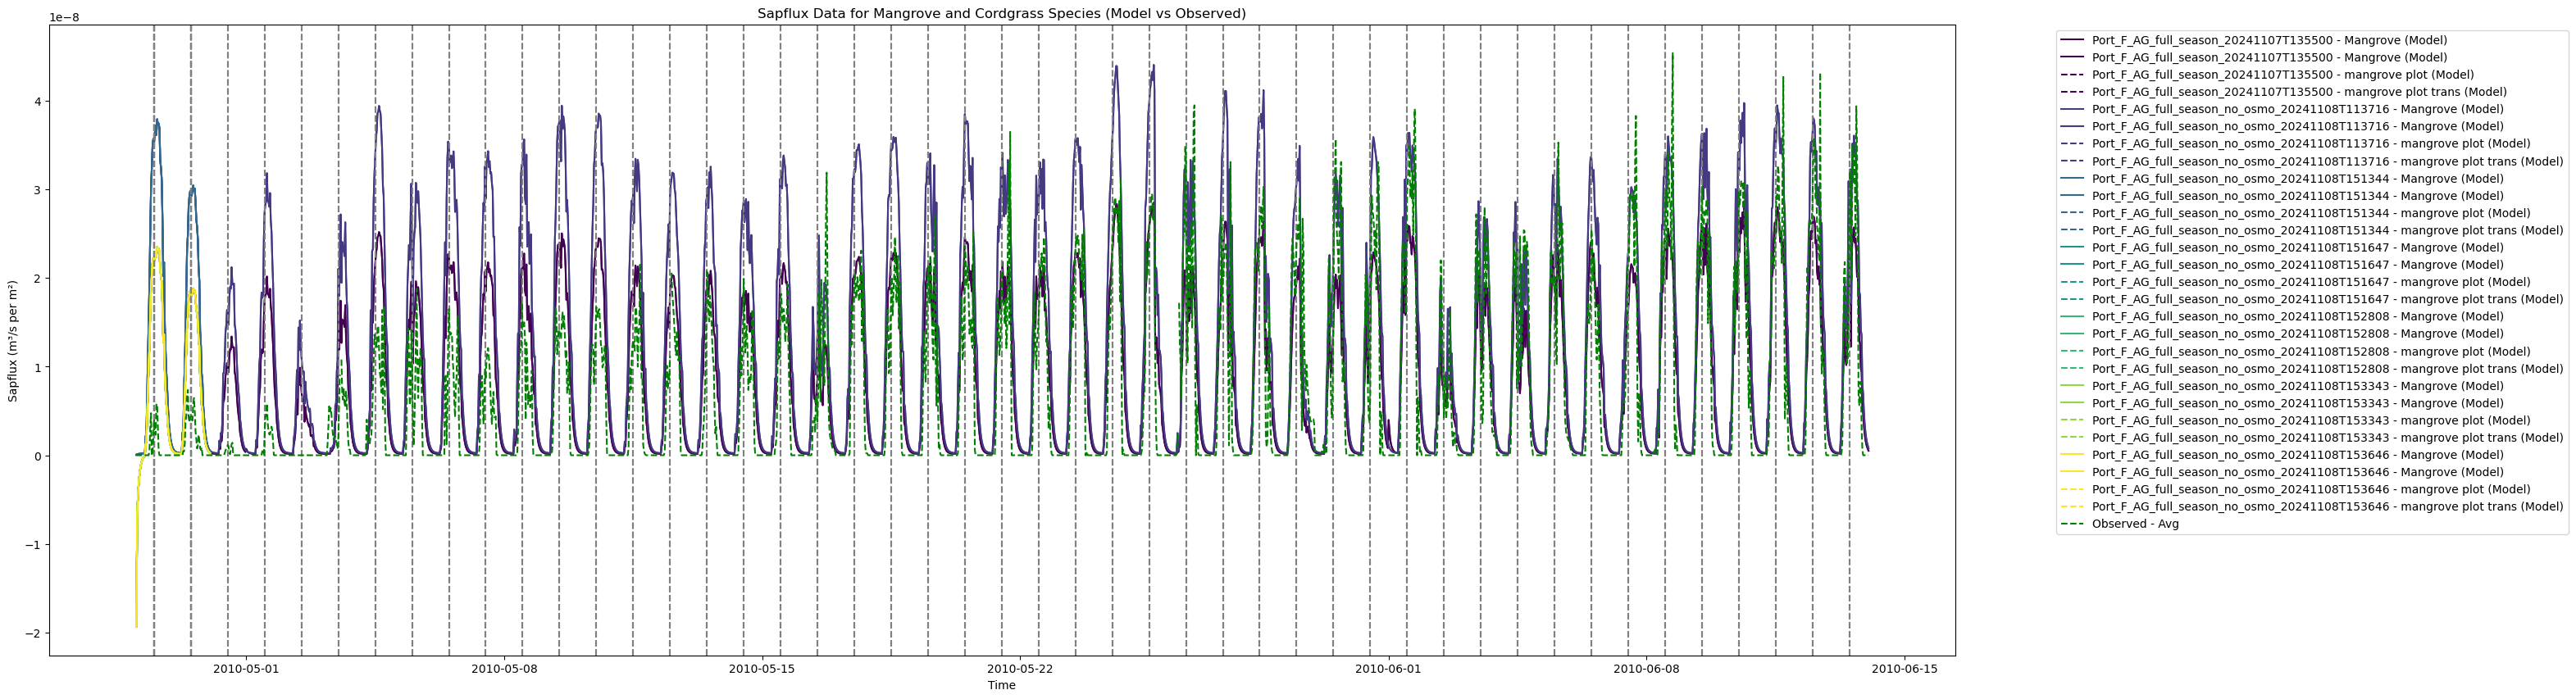

Port_F_AG_full_season_20241107T135500 - Mangrove (Model): RMSE = 0.00000, R² = 0.657
Port_F_AG_full_season_no_osmo_20241108T113716 - Mangrove (Model): RMSE = 0.00000, R² = -0.050
Port_F_AG_full_season_no_osmo_20241108T151344 - Mangrove (Model): RMSE = 0.00000, R² = -81.128
Port_F_AG_full_season_no_osmo_20241108T151647 - Mangrove (Model): RMSE = 0.00000, R² = -28.890
Port_F_AG_full_season_no_osmo_20241108T152808 - Mangrove (Model): RMSE = 0.00000, R² = -28.890
Port_F_AG_full_season_no_osmo_20241108T153343 - Mangrove (Model): RMSE = 0.00000, R² = -28.890
Port_F_AG_full_season_no_osmo_20241108T153646 - Mangrove (Model): RMSE = 0.00000, R² = -28.890


In [103]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Define the paths for the parent folder and observed data file
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/CH2_practice"
observed_data_path = R"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\data\Port_F_data\Port_F_SFdata_2010.csv"  # Update this path to the observed data file

# Load observed data CSV file
observed_df = pd.read_csv(observed_data_path)

# Convert 'TIMESTAMP' column to datetime in observed data
observed_df['TIMESTAMP'] = pd.to_datetime(observed_df['TIMESTAMP'])
# Convert observed data columns to float, handling errors by coercing to NaN
for col in ['SF2', 'SF3', 'SF4', 'SF5', 'SF6', 'SF7', 'SF8', 'avg_m3/s']:
    observed_df[col] = pd.to_numeric(observed_df[col], errors='coerce')
# Initialize a list to store the dataframes
dfs = []

# Create a larger figure
plt.figure(figsize=(30, 10))

# Define a list of colors for different model runs
colors = plt.cm.viridis(np.linspace(0, 1, len(os.listdir(parent_folder))))

# Prepare lists to store model outputs for RMSE/R^2 calculation
mangrove_all_runs = pd.DataFrame()
cordgrass_all_runs = pd.DataFrame()

# Iterate over the subfolders to plot model data
for i, folder in enumerate(os.listdir(parent_folder)):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_sapflux.csv")
        if os.path.exists(csv_file_path):
            # Load CSV file as dataframe
            df = pd.read_csv(csv_file_path)
            
            # Convert 'time' column to datetime in model data
            df['time'] = pd.to_datetime(df['time'])
            
            # Filter data for mangrove and cordgrass species
            mangrove_df = df[df['species'] == 'mangrove']
            cordgrass_df = df[df['species'] == 'cordgrass']
            plt_df = df[df['species'] == 'plt_tot']
            
            # Assign a unique color for this run
            color = colors[i]
            
            # Store model outputs for RMSE and R^2 calculations
            mangrove_all_runs[folder] = mangrove_df.set_index('time')['sapflux']
            cordgrass_all_runs[folder] = cordgrass_df.set_index('time')['sapflux'] * 3.6e6  # Convert cordgrass sapflux

            # Plot sapflux data for mangrove (model)
            plt.plot(mangrove_df['time'], mangrove_df['sapflux'], label=f'{folder} - Mangrove (Model)', color=color)
            plt.plot(mangrove_df['time'], mangrove_df['sapflux'], label=f'{folder} - Mangrove (Model)', color=color)
            # Plot sapflux data for cordgrass (model)
            plt.plot(plt_df['time'], plt_df['sapflux_plot'], label=f'{folder} - mangrove plot (Model)', color=color, linestyle='--')
            plt.plot(plt_df['time'], plt_df['trans'], label=f'{folder} - mangrove plot trans (Model)', color=color, linestyle='--')
            
            # Draw vertical dashed lines at all locations of 12 noon
            for day in mangrove_df['time']:
                if day.hour == 12 and day.minute == 0:  # Check for both hour and minute values
                    plt.axvline(x=day, linestyle='--', color='gray')

# Filter observed data to the same date range as model data
date_range_start = mangrove_all_runs.index.min()
date_range_end = mangrove_all_runs.index.max()
observed_df = observed_df[(observed_df['TIMESTAMP'] >= date_range_start) & (observed_df['TIMESTAMP'] <= date_range_end)]

# Convert observed data columns to float, handling errors by coercing to NaN
observed_df['avg_m3/s'] = pd.to_numeric(observed_df['avg_m3/s'], errors='coerce')

# Resample observed data to align with model data timestamps, if needed
observed_resampled = observed_df.set_index('TIMESTAMP').reindex(mangrove_all_runs.index)['SF7']

# Plot observed sap flux data
plt.plot(observed_resampled.index, observed_resampled, label='Observed - Avg', color='green', linestyle='--')

# Label axes and title
plt.xlabel('Time')
plt.ylabel('Sapflux (m³/s per m²)')
plt.title('Sapflux Data for Mangrove and Cordgrass Species (Model vs Observed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

# Calculate RMSE and R^2 for Mangrove and Cordgrass against observed data
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE and R^2 for each mangrove model run against observed data
for column in mangrove_all_runs.columns:
    # Align observed and model data by dropping rows with NaN in either series
    valid_data = pd.concat([observed_resampled, mangrove_all_runs[column]], axis=1, join='inner').dropna()
    observed_clean = valid_data.iloc[:, 0]
    mangrove_model_clean = valid_data.iloc[:, 1]
    
    # Calculate RMSE and R²
    mangrove_rmse = mean_squared_error(observed_clean, mangrove_model_clean, squared=False)
    mangrove_r2 = r2_score(observed_clean, mangrove_model_clean)
    
    # Print the results
    print(f"{column} - Mangrove (Model): RMSE = {mangrove_rmse:.5f}, R² = {mangrove_r2:.3f}")



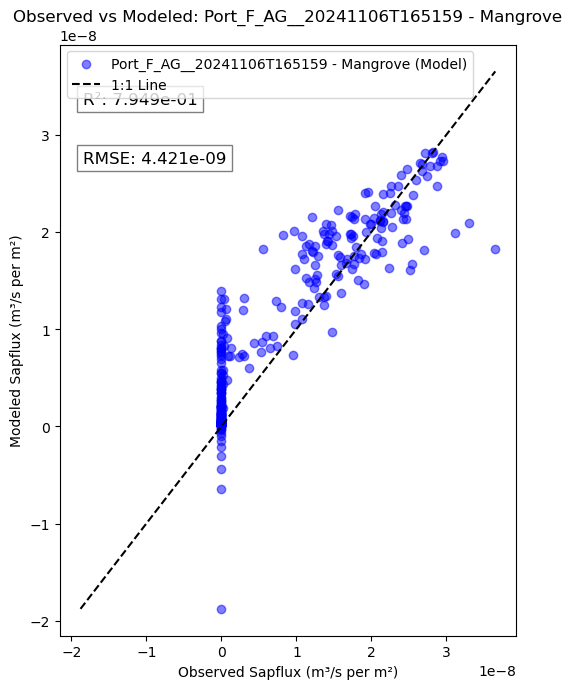

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Create a larger figure for both scatter plots
plt.figure(figsize=(15, 7))

# Plot observed vs. modeled for each mangrove run
for i, column in enumerate(mangrove_all_runs.columns):
    plt.subplot(1, 3, i + 1)  # Create two subplots, one for each model run
    
    # Drop NaNs from both observed and model data to calculate metrics accurately
    valid_data = pd.concat([observed_resampled, mangrove_all_runs[column]], axis=1, join="inner").dropna()
    observed_clean = valid_data.iloc[:, 0]
    mangrove_model_clean = valid_data.iloc[:, 1]
    
    # Calculate RMSE and R² for the current model run
    mangrove_rmse = mean_squared_error(observed_clean, mangrove_model_clean, squared=False)
    mangrove_r2 = r2_score(observed_clean, mangrove_model_clean)
    
    # Scatter plot of observed vs modeled data
    plt.scatter(observed_clean, mangrove_model_clean, alpha=0.5, label=f"{column} - Mangrove (Model)", color="blue")
    
    # Plot the 1:1 line
    max_val = max(observed_clean.max(), mangrove_model_clean.max())
    min_val = min(observed_clean.min(), mangrove_model_clean.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'k--', label="1:1 Line")
    
    # Add RMSE and R² to the plot in scientific notation
    plt.text(0.05, 0.9, f"R²: {mangrove_r2:.3e}", transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor="white", alpha=0.5))
    plt.text(0.05, 0.8, f"RMSE: {mangrove_rmse:.3e}", transform=plt.gca().transAxes, fontsize=12, 
             bbox=dict(facecolor="white", alpha=0.5))
    
    # Plot settings
    plt.xlabel("Observed Sapflux (m³/s per m²)")
    plt.ylabel("Modeled Sapflux (m³/s per m²)")
    plt.title(f"Observed vs Modeled: {column} - Mangrove")
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [78]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Clean data by removing NaN or infinity values in observed and modeled data
observed_clean = observed_resampled.replace([np.inf, -np.inf], np.nan).dropna()
mangrove_clean = mangrove_all_runs.replace([np.inf, -np.inf], np.nan).dropna()

# Ensure both datasets have the same length after cleaning (optional but can be important)
min_length = min(len(observed_clean), len(mangrove_clean))
observed_clean = observed_clean.iloc[:min_length]
mangrove_clean = mangrove_clean.iloc[:min_length]

# Calculate the mean of observed data
observed_mean = observed_clean.mean()

# Initialize dictionary to store NMAE results
nmae_results = {}

# Calculate NMAE for each model run
for column in mangrove_clean.columns:
    # Compute Mean Absolute Error
    mae = mean_absolute_error(observed_clean, mangrove_clean[column])
    # Normalize by the mean observed value
    nmae = (mae / observed_mean) * 100
    nmae_results[column] = nmae
    print(f"NMAE for {column}: {nmae:.2f}%")

# Display NMAE results for each model run
nmae_results


NMAE for Port_F_AG__20241106T165159: 43.00%


{'Port_F_AG__20241106T165159': 43.00131056361069}

Transpiration top of canopy modeled data

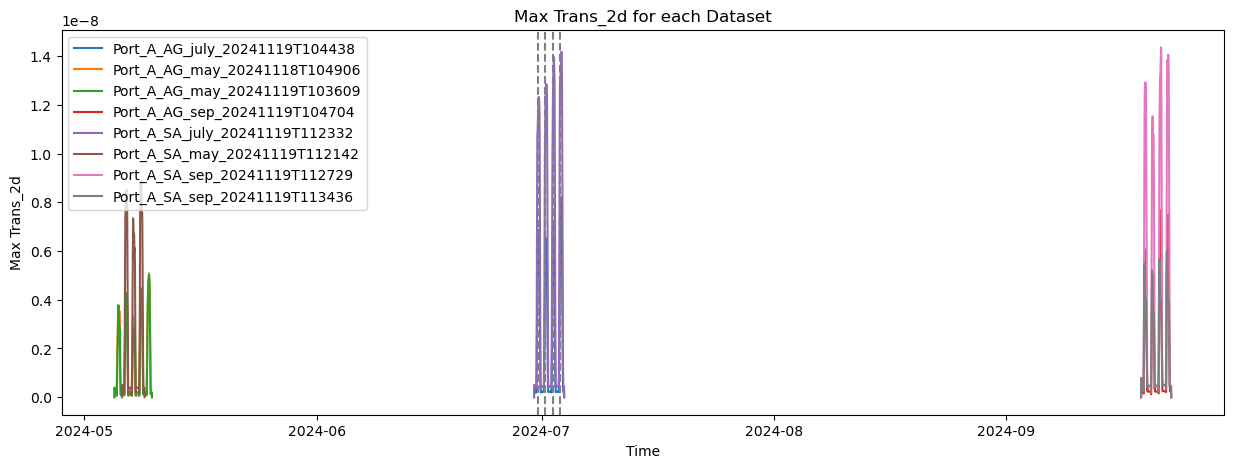

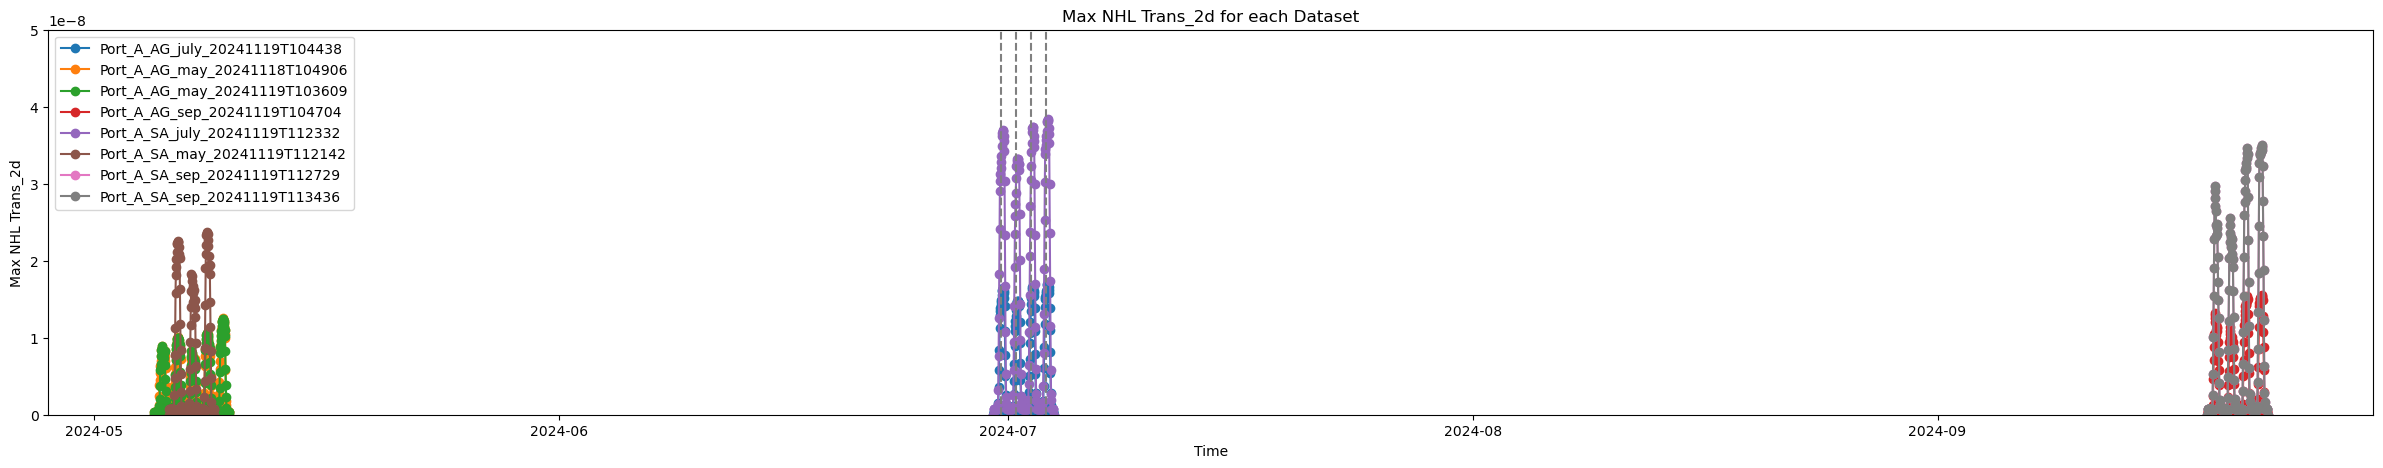

In [61]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the parent folder path
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/CH2_practice_port_a"

# Initialize lists to store the maximum values and labels for each dataset
max_trans_2d_values = []
max_nhl_trans_2d_values = []
folder_labels = []  # To store folder names for labeling

# Iterate over the subfolders
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path_trans_2d = os.path.join(folder_path, "csv_folder", "ds_canopy.csv")
        csv_file_path_nhl_trans_2d = os.path.join(folder_path, "csv_folder", "ds_canopy.csv")
        if os.path.exists(csv_file_path_trans_2d) and os.path.exists(csv_file_path_nhl_trans_2d):
            # Load CSV file as dataframe
            df_trans_2d = pd.read_csv(csv_file_path_trans_2d)
            df_nhl_trans_2d = pd.read_csv(csv_file_path_nhl_trans_2d)
            
            # Convert time column to datetime
            df_trans_2d['time'] = pd.to_datetime(df_trans_2d['time'])
            df_nhl_trans_2d['time'] = pd.to_datetime(df_nhl_trans_2d['time'])
            
            # Group by time and calculate the maximum value
            max_trans_2d_value = df_trans_2d.groupby('time')['trans_2d'].max()
            max_nhl_trans_2d_value = df_nhl_trans_2d.groupby('time')['nhl_trans_2d'].max()
            
            # Append to the lists
            max_trans_2d_values.append(max_trans_2d_value)
            max_nhl_trans_2d_values.append(max_nhl_trans_2d_value)
            folder_labels.append(folder)  # Store folder name as label

# Plot the max value at each timestep for each dataset (trans_2d)
plt.figure(figsize=(15, 5))
for i, max_trans_2d_value in enumerate(max_trans_2d_values):
    plt.plot(max_trans_2d_value, label=folder_labels[i])  # Use folder name as label
#plt.plot(observed_df['TIMESTAMP'], observed_df['avg_m3/s'], label='Observed - Avg', color='red', linestyle='--')
#plt.plot(observed_df['TIMESTAMP'], observed_df['SF7'], label='Observed - Avg', color='blue', linestyle='--')
# Draw vertical dashed lines at all locations of 12 noon
for day in max_trans_2d_values[0].index:
    if day.hour == 12 and day.minute == 0:  # Check for both hour and minute values
        plt.axvline(x=day, linestyle='--', color='gray')

plt.xlabel('Time')
plt.ylabel('Max Trans_2d')
plt.title('Max Trans_2d for each Dataset')
plt.legend()
plt.show()

# Plot the max value at each timestep for each dataset (nhl_trans_2d)
plt.figure(figsize=(30, 5))
for i, max_nhl_trans_2d_value in enumerate(max_nhl_trans_2d_values):
    plt.plot(max_nhl_trans_2d_value, marker='o', label=folder_labels[i])  # Use folder name as label
plt.ylim(0,5e-8)
# Draw vertical dashed lines at all locations of 12 noon
for day in max_nhl_trans_2d_values[0].index:
    if day.hour == 12 and day.minute == 0:  # Check for both hour and minute values
        plt.axvline(x=day, linestyle='--', color='gray')

plt.xlabel('Time')
plt.ylabel('Max NHL Trans_2d')
plt.title('Max NHL Trans_2d for each Dataset')
plt.legend()
plt.show()


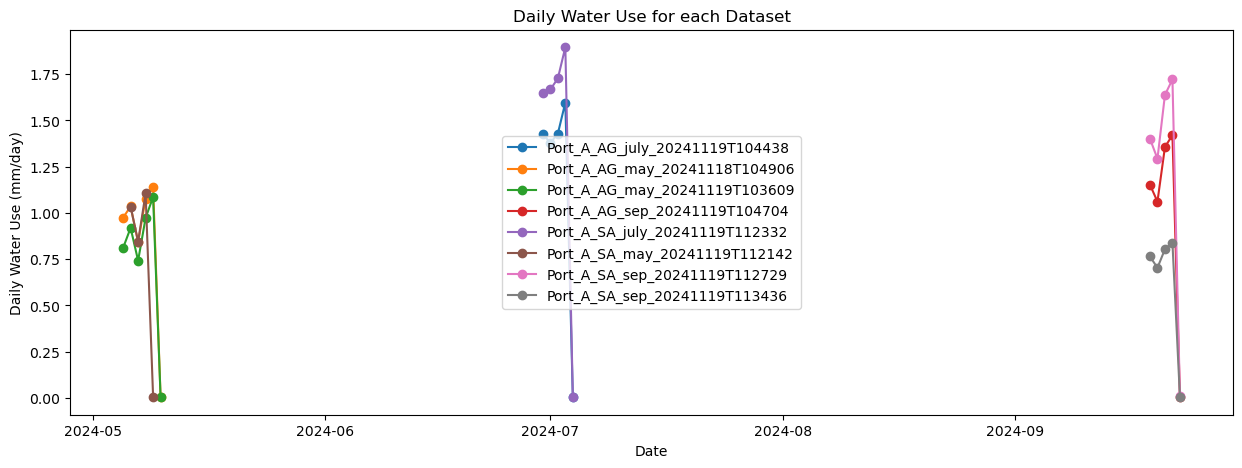

In [62]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the parent folder path
parent_folder = "C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/CH2_practice_port_a"

# Initialize lists to store daily water use and labels for each dataset
daily_water_use = []
folder_labels = []  # To store folder names for labeling

# Iterate over the subfolders
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path_trans_2d = os.path.join(folder_path, "csv_folder", "ds_canopy.csv")
        if os.path.exists(csv_file_path_trans_2d):
            # Load CSV file as dataframe
            df_trans_2d = pd.read_csv(csv_file_path_trans_2d)
            
            # Convert time column to datetime
            df_trans_2d['time'] = pd.to_datetime(df_trans_2d['time'])
            
            # Calculate transpiration per 30 minutes (m³ H2O m⁻² crown m⁻¹)
            df_trans_2d['trans_2d_30min'] = df_trans_2d['trans_2d'] * 1800
            
            # Convert to mm per 30 minutes
            df_trans_2d['trans_2d_mm_30min'] = df_trans_2d['trans_2d_30min'] * 1000  # Convert m³ to mm
            
            # Group by date and sum the 30-minute values
            df_trans_2d['date'] = df_trans_2d['time'].dt.date
            daily_sum = df_trans_2d.groupby('date')['trans_2d_mm_30min'].sum()
            
            # Append to the lists
            daily_water_use.append(daily_sum)
            folder_labels.append(folder)  # Store folder name as label

# Plot daily water use for each dataset
plt.figure(figsize=(15, 5))
for i, daily_sum in enumerate(daily_water_use):
    plt.plot(daily_sum.index, daily_sum.values, marker='o', label=folder_labels[i])  # Use folder name as label

plt.xlabel('Date')
plt.ylabel('Daily Water Use (mm/day)')
plt.title('Daily Water Use for each Dataset')
plt.legend()
plt.show()


Top of canopy leaf water potential modeled data

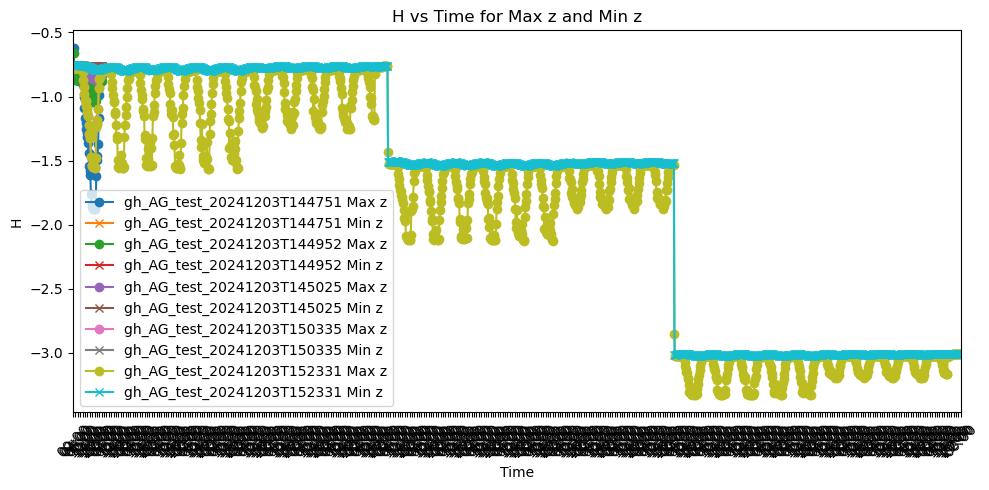

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the parent folder path
parent_folder = r"C:/Users/maria/Box/GradSchool/GitHub/fetch3_nhl/output/gh_test"

# Initialize lists to store the H values for max and min z for each dataset
H_max_values = []
H_min_values = []
time_values = []
folder_labels = []  # Store folder names for labeling

# Iterate over the subfolders
for folder in os.listdir(parent_folder):
    folder_path = os.path.join(parent_folder, folder)
    if os.path.isdir(folder_path):
        csv_file_path = os.path.join(folder_path, "csv_folder", "ds_canopy.csv")
        if os.path.exists(csv_file_path):
            # Load CSV file as dataframe
            df = pd.read_csv(csv_file_path)
            
            # Filter rows where 'z' column has maximum value
            max_z = df['z'].max()
            filtered_max_df = df[df['z'] == max_z]
            
            # Filter rows where 'z' column has minimum value
            min_z = df['z'].min()
            filtered_min_df = df[df['z'] == min_z]
            
            # Append H values and time values to lists (excluding the first row)
            H_max_values.append(filtered_max_df['H'][1:])  # Skip the first row
            H_min_values.append(filtered_min_df['H'][1:])  # Skip the first row
            time_values.append(pd.to_datetime(filtered_max_df['time'][1:]))  # Use the same time for both max and min
            folder_labels.append(folder)  # Store folder name for labeling

# Plot H values against time for both max z and min z
plt.figure(figsize=(10, 5))
for i, (time, H_max, H_min) in enumerate(zip(time_values, H_max_values, H_min_values)):
    plt.plot(time, H_max, marker='o', label=f'{folder_labels[i]} Max z')
    plt.plot(time, H_min, marker='x', label=f'{folder_labels[i]} Min z')

# Customize the x-axis to show time labels every few hours
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=2))  # Set interval to 2 hours
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))  # Format the labels

# Set x-axis limits to start at 5 AM
first_time_date = time_values[0].iloc[0].date()  # Use the date of the first time entry
xlim_start_dt = pd.Timestamp.combine(first_time_date, pd.Timestamp('00:00').time())  # Create 5 AM datetime

# Set x-axis limits (xlim) to start at 5 AM and extend to the max time in the datasets
plt.xlim(xlim_start_dt, max(max(time) for time in time_values))

plt.xlabel('Time')
plt.ylabel('H')
plt.title('H vs Time for Max z and Min z')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to avoid clipping of labels
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_36016\3149650426.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_max_df['time'] = pd.to_datetime(filtered_max_df['time'])


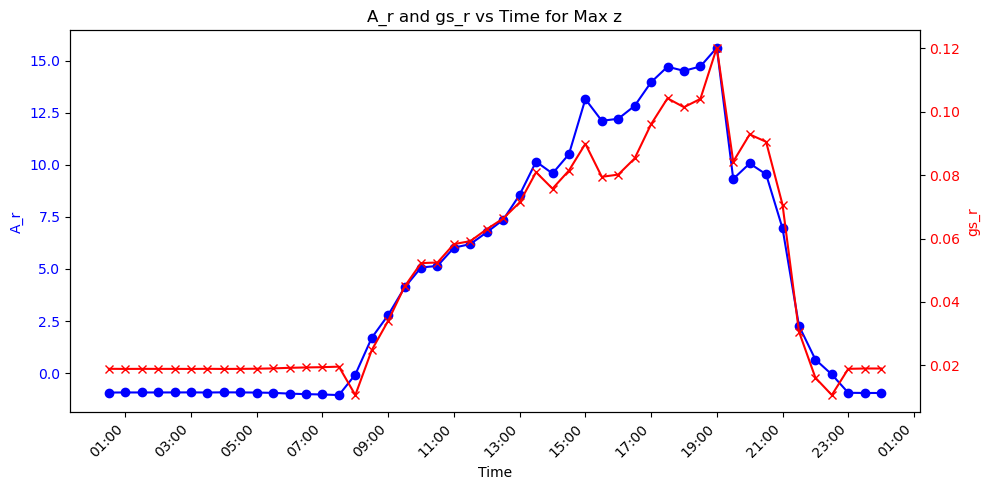

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the CSV file path
csv_file_path = r"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\output\gh_test\gh_AG_test_20241203T150335\A_gs_wplimit_timesteps.csv"

# Load CSV file as dataframe
df = pd.read_csv(csv_file_path)

# Filter rows where 'z' column has maximum value
max_z = df['z'].max()
filtered_max_df = df[df['z'] == max_z]

# Convert 'time' column to datetime format
filtered_max_df['time'] = pd.to_datetime(filtered_max_df['time'])

# Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot A_r values on the first y-axis (left side)
ax1.plot(filtered_max_df['time'][1:], filtered_max_df['A'][1:], marker='o', color='blue', label='A_r')
ax1.set_xlabel('Time')
ax1.set_ylabel('A_r', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis major ticks to display every 2 hours
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis labels diagonally for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(filtered_max_df['time'][1:], filtered_max_df['gs'][1:], marker='x', color='red', label='gs_r')
ax2.set_ylabel('gs_r', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout adjustment
plt.title('A_r and gs_r vs Time for Max z')
plt.tight_layout()  # Adjust layout to avoid clipping of labels

# Show the plot
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_39588\4064729874.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_max_df['time'] = pd.to_datetime(filtered_max_df['time'])


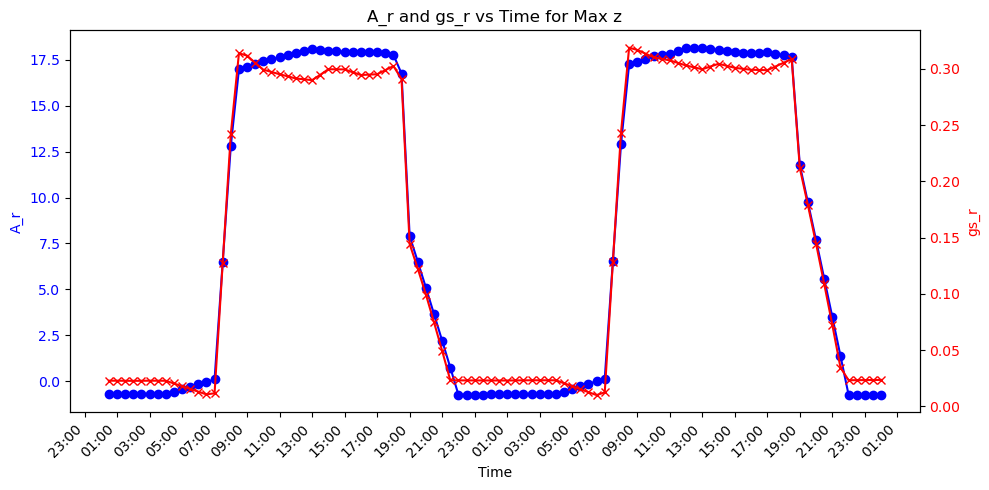

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the CSV file path
csv_file_path = r"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\output\CH2_practice_port_a\Port_A_AG__20241028T155022\A_and_gs.csv"

# Load CSV file as dataframe
df = pd.read_csv(csv_file_path)

# Filter rows where 'z' column has maximum value
max_z = df['z'].max()
filtered_max_df = df[df['z'] == max_z]

# Convert 'time' column to datetime format
filtered_max_df['time'] = pd.to_datetime(filtered_max_df['time'])

# Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot A_r values on the first y-axis (left side)
ax1.plot(filtered_max_df['time'][1:], filtered_max_df['A_r'][1:], marker='o', color='blue', label='A_r')
ax1.set_xlabel('Time')
ax1.set_ylabel('A_r', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Set x-axis major ticks to display every 2 hours
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis labels diagonally for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(filtered_max_df['time'][1:], filtered_max_df['gs_r'][1:], marker='x', color='red', label='gs_r')
ax2.set_ylabel('gs_r', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Turn off the secondary x-axis to prevent double printing
ax2.get_xaxis().set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Title and layout adjustment
plt.title('A_r and gs_r vs Time for Max z')
plt.tight_layout()  # Adjust layout to avoid clipping of labels

# Show the plot
plt.show()


C:\Users\maria\AppData\Local\Temp\ipykernel_54784\3490027014.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_max_df['time'] = pd.to_datetime(filtered_max_df['time'])


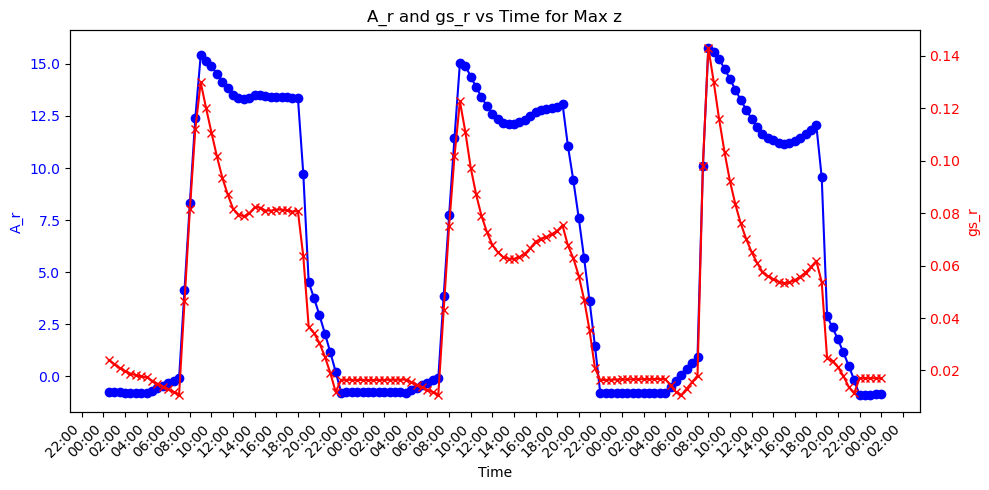

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Define the CSV file path
csv_file_path = r"C:\Users\maria\Box\GradSchool\GitHub\fetch3_nhl\output\CH2_practice_port_a\Port_A_AG__20241104T141836\A_gs_wplimit_timesteps.csv"

# Load CSV file as dataframe
df = pd.read_csv(csv_file_path)

# Filter rows where 'z' column has maximum value
max_z = df['z'].max()
filtered_max_df = df[df['z'] == max_z]

# Convert 'time' column to datetime format
filtered_max_df['time'] = pd.to_datetime(filtered_max_df['time'])

# Create the figure and axis for the plot
fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot A_r values on the first y-axis (left side)
ax1.plot(filtered_max_df['time'][1:], filtered_max_df['A'][1:], marker='o', color='blue', label='A_r')
ax1.set_xlabel('Time')
ax1.set_ylabel('A_r', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Set x-axis major ticks to display every 2 hours
ax1.xaxis.set_major_locator(mdates.HourLocator(interval=2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis labels diagonally for better readability
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(filtered_max_df['time'][1:], filtered_max_df['gs'][1:], marker='x', color='red', label='gs_r')
ax2.set_ylabel('gs_r', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Title and layout adjustment
plt.title('A_r and gs_r vs Time for Max z')
plt.tight_layout()  # Adjust layout to avoid clipping of labels

# Show the plot
plt.show()


In [65]:
import xarray as xr
import pandas as pd

# Specify the GRIB file path
grib_file = R"C:\Users\maria\Downloads\2dcfc65b9aced04f58f0b100a7511b88.grib"

# Load GRIB file using xarray (cfgrib engine)
ds = xr.open_dataset(grib_file, engine="cfgrib")

# Convert the dataset to a pandas DataFrame
df = ds.to_dataframe().reset_index()

# Specify the output CSV file path
csv_file = 'C:/Users/maria/Box/GradSchool/Research/Port_A/fetch_met_Data/frictionvelocity_2024Porta.csv'

# Save the DataFrame to CSV
df.to_csv(csv_file, index=False)

print(f"GRIB data successfully converted to CSV: {csv_file}")


GRIB data successfully converted to CSV: C:/Users/maria/Box/GradSchool/Research/Port_A/fetch_met_Data/frictionvelocity_2024Porta.csv
